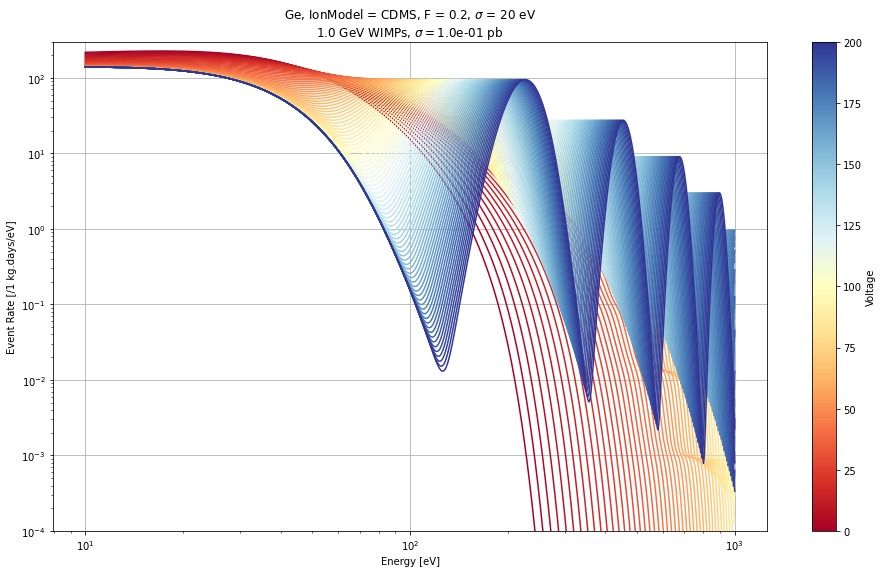

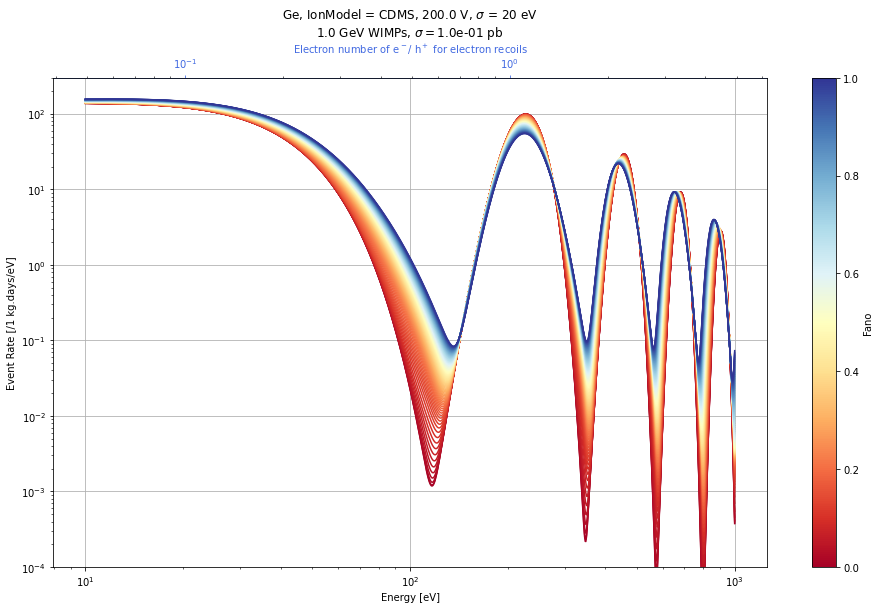

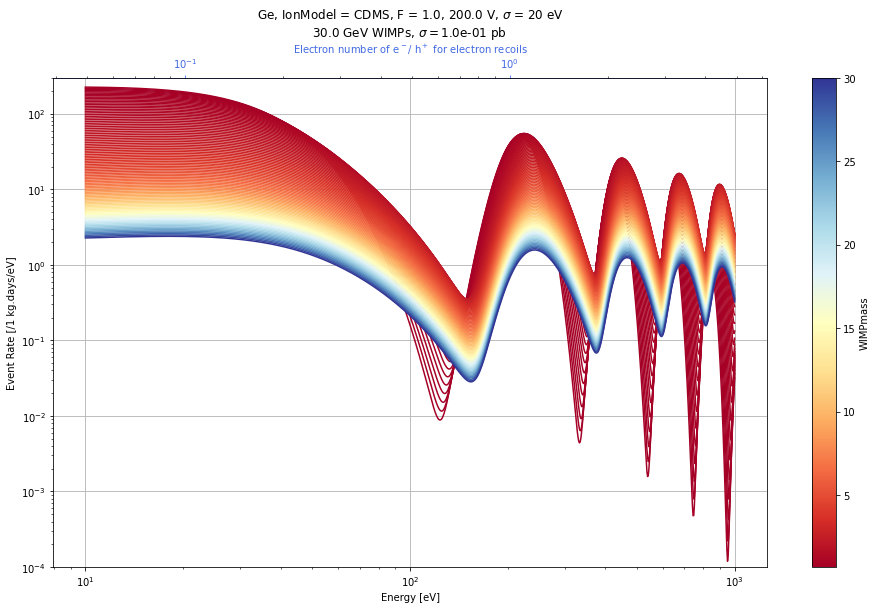

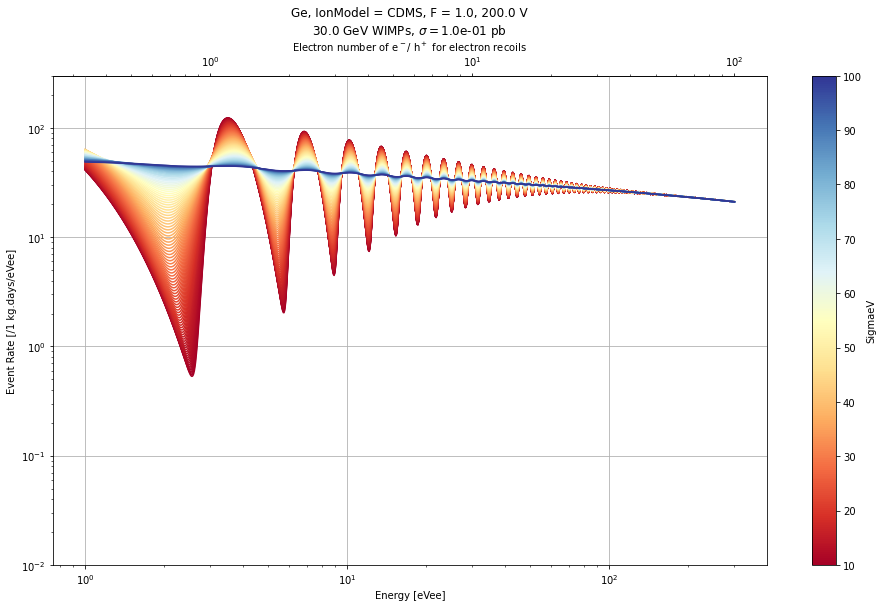

In [3]:
from Tools_Libraries import *
from IonModel_Libraries import *
from LimitSetting_Libraries import *
from WIMP_Libraries import *
from DP_Libraries import *
from Ultimate_Libraries import *

def ExamplePlotMulti(Exp = Experiment(),
                     W = WIMP_Parameters(), 
                     Variable = "Voltage",
                     Valuemin = 0, 
                     Valuemax = 200, 
                     NValues = 100, 
                     logvalues = False,
                     Emin = 10,
                     Emax = 1e3, 
                     nptx = 1000, 
                     Energyscale = "eV",
                     logx = True,
                     ymin = 1e-4,
                     ymax = 3e2):
    
    # Plotoptions
    assert Energyscale in ["eV","eVee"]
    x = np.linspace(Emin,Emax,nptx) if logx==False else np.logspace(np.log10(Emin),np.log10(Emax),nptx)
    yscale_inputs = True
    
    
    # MultiLineOptions
    Available = ["Fano","Voltage","SigmaeV","WIMPmass"]
    assert Variable in Available
    Fixed = Available.copy()
    Fixed.remove(Variable)
    Values = np.linspace(Valuemin,Valuemax,NValues) if logvalues ==False else np.logspace(np.log10(Valuemin),np.log10(Valuemax),NValues)

    colormap = cm.RdYlBu #cm.coolwarm
    normalize = plt.Normalize(Valuemin,Valuemax)
    
    assert Exp.IonModel in ["CDMS","Rouven"]
    if Variable == "Fano":
        assert Exp.IonModel == "CDMS"
    
    assert Exp.Quenching in ["EDW","Lindhard_pure","Lindhard_corrected"]    

    fig,ax = plt.subplots(figsize=(16,9))#,constrained_layout=True) 
    for Value in Values:  
        if Variable == "Fano":
            Exp.Fano = Value
        elif Variable == "Voltage":
            Exp.Voltage = Value
        elif Variable == "SigmaeV":
            Exp.SigmaeV = Value
        elif Variable == "WIMPmass":
            W.WIMPmass = Value
        else:
            AssertionError
    
        S = Spectrum(W,Exp)
        TF1_WIMPs_EphononSmeared = S.GetEphononSmearedFunc(Energyscale)  # ["eV","eVee]
        plt.plot(x,TF1_WIMPs_EphononSmeared(x),color=colormap(normalize(Value)))
        
    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(NValues)
    cbar = plt.colorbar(scalarmappaple)
    cbar.set_label(Variable)
    #cbar = plt.colorbar(scalarmappaple,ticks=voltages) 
    plt.yscale('log')
    plt.xscale('log') if logx else plt.xscale('linear')
    plt.grid()
    Title = Exp.Target+", IonModel = "+Exp.IonModel
    DicTitle = dict()
    
    for i in Fixed:
        if i == "Fano": 
            Title += ", F = {}".format(Exp.Fano)
        if i == "Voltage":
            Title += ", {} V".format(Exp.Voltage) 
        if i == "SigmaeV":     
            Title += ", $\sigma$ = {} eV".format(Exp.SigmaeV)
            
    if "WIMP" in str(S.Stype):
        Title +="\n"
        Title +="{:.1f} GeV WIMPs, ".format(W.WIMPmass) 
        Title +="$\sigma=${:.1e} pb ".format(W.CrossSection) 
    plt.title(Title)
    plt.xlabel("Energy [{0}]".format(Energyscale))
    plt.ylabel("Event Rate [/{0} kg.days/{1}]".format(Exp.Exposure,Energyscale))
    if yscale_inputs:
        plt.ylim((ymin,ymax))
    if Variable != "Voltage":      
        if(Energyscale=="eVee"):
            ftransform = lambda x : x/Exp.Epsilon
            finv = lambda x : x*Exp.Epsilon
            secax = ax.secondary_xaxis('top', functions=(ftransform,finv))
        else:
            ftransform = lambda x : x/(1+Exp.Voltage/Exp.Epsilon)/Exp.Epsilon
            finv = lambda x : x*(1+Exp.Voltage/Exp.Epsilon)/Exp.Epsilon
            secax = ax.secondary_xaxis('top', functions=(ftransform,finv),color="royalblue")
         
        secax.set_xlabel('Electron number of e$^-$/ h$^+$ for electron recoils')
    
################################################################################################
##############################################
# on définit d'abord les paramètres qui seront 
Exp = Experiment()
Exp.Voltage = 100 # Volts
Exp.SigmaeV = 20  # Phonon baseline resolution
Exp.Exposure = 1 # kg.days
Exp.IonModel = "CDMS"
Exp.Fano = 0.2 # used only when IonModel=="CDMS"
Exp.Target = "Ge"
Exp.Quenching = "EDW"

W = WIMP_Parameters()
W.WIMPmass = 1 # GeV/c2
W.CrossSection = 1e-1 # pb 
#W.Exposure = 1 # kg.days always put 1 kg.day for WIMPs to avoid double scaling with Spectrum
W.Target = Exp.Target # ["Ge",...]

ExamplePlotMulti(Exp = Exp, W = W, Variable = "Voltage" , Valuemin = 0  , Valuemax = 200, NValues = 100, logvalues = False)
ExamplePlotMulti(Exp = Exp, W = W, Variable = "Fano"    , Valuemin = 0  , Valuemax =   1, NValues = 100, logvalues = False)
ExamplePlotMulti(Exp = Exp, W = W, Variable = "WIMPmass", Valuemin = 0.7, Valuemax =  30, NValues = 100, logvalues = True)
ExamplePlotMulti(Exp = Exp, W = W, Variable = "SigmaeV" , Valuemin = 10 , Valuemax = 100, NValues = 100, logvalues = True, Emin = 1, Emax = 300, Energyscale = "eVee", ymin=1e-2)